In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn.functional as F

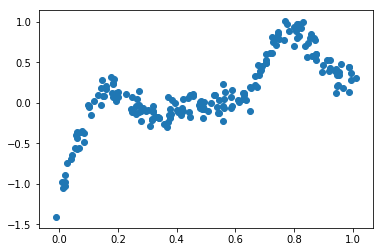

In [62]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
plt.scatter(x,y)

In [63]:
inp  = np.c_[x,y]
inp

array([[-0.00991055, -1.40717325],
       [ 0.02737668, -0.74771907],
       [ 0.01946878, -0.97129452],
       [ 0.00867568, -0.98125158],
       [ 0.01324897, -1.05391649],
       [ 0.03946103, -0.68774666],
       [ 0.02080322, -0.89450953],
       [ 0.05426569, -0.5534236 ],
       [ 0.05967149, -0.57483046],
       [ 0.02080375, -1.02704539],
       [ 0.05583059, -0.39860016],
       [ 0.04307968, -0.64114538],
       [ 0.06049863, -0.35422355],
       [ 0.07217035, -0.35962643],
       [ 0.0768061 , -0.35293655],
       [ 0.06784316, -0.56049492],
       [ 0.11668318,  0.02686964],
       [ 0.06009222, -0.38800095],
       [ 0.09807187, -0.02989822],
       [ 0.10133256, -0.04920258],
       [ 0.08500236, -0.4798983 ],
       [ 0.06060032, -0.43510772],
       [ 0.14291708,  0.1832349 ],
       [ 0.085059  , -0.37348452],
       [ 0.10922761, -0.1524558 ],
       [ 0.10235045, -0.03712246],
       [ 0.13290411,  0.09266915],
       [ 0.15795253,  0.16789766],
       [ 0.14688357,

In [106]:
X = torch.from_numpy(inp).type(torch.float32)
X_ = torch.cat((X, torch.ones(X.shape[0], 1)), dim=1)

W = torch.empty(2,1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
torch.nn.init.uniform_(W)

alpha = 0.01
optimizer = torch.optim.SGD(params=[W, b], lr=alpha)
W, '\n', b

(tensor([[0.0748],
         [0.8558]], requires_grad=True),
 '\n',
 tensor([0.], requires_grad=True))

In [166]:
for i in range(1000):
#     X = X.view((-1,2))
    h = X.mm(W) + b
#     W_ = torch.from_numpy(np.linalg.pinv(W.data.numpy()))
    W_ = W.t()
    X_ = h.mm(W_)
    
    optimizer.zero_grad()
    loss = F.mse_loss(X_, X)
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:
        print('loss = ',loss)
    

loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
loss =  tensor(0.0474, grad_fn=<MseLossBackward>)


In [167]:
W

tensor([[0.8326],
        [0.5539]], requires_grad=True)

In [168]:
b

tensor([7.4985e-07], requires_grad=True)

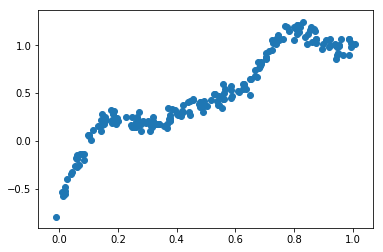

In [169]:
plt.scatter(x, h.data.numpy())

In [170]:
WW = W[0]/W[1]
WW

tensor([1.5030], grad_fn=<DivBackward0>)

In [171]:
bb = b/W[1]
bb

tensor([1.3537e-06], grad_fn=<DivBackward0>)

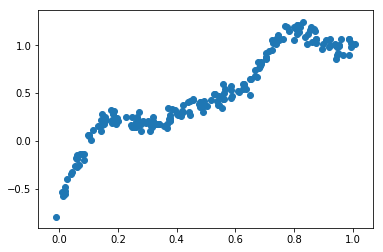

In [172]:
# plt.plot((X.mm(W)+bb).data.numpy())  # same
plt.scatter(x,h.data.numpy())

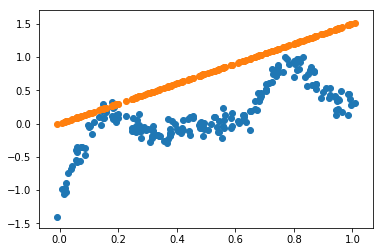

In [173]:
yy=WW.data.numpy()*x + bb.data.numpy()
# yy
plt.scatter(x,y)
plt.scatter(x,yy)

components tensor([[0.6931, 0.4612],
        [0.4612, 0.3068]], grad_fn=<MmBackward>)


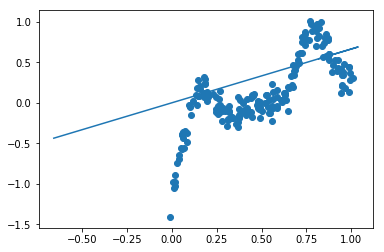

In [174]:
xxx = h.mm(W_)
plt.scatter(x,y)
plt.plot(xxx.data.numpy()[:,0],xxx.data.numpy()[:,1] )
print('components', W.mm(W.t()))

In [177]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(inp)
# plt.plot(principalComponents)
print(pca.components_)

[[-0.51794801 -0.8554121 ]]


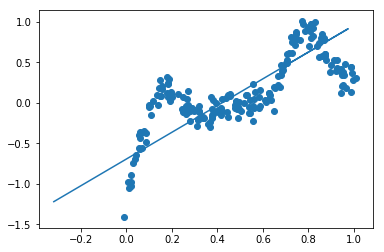

In [178]:
line = pca.inverse_transform(principalComponents)
# plt.plot(line)
plt.scatter(x,y)
plt.plot(line[:, 0], line[:,1])